In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

In [2]:
oleo = pd.read_excel('BOc1.xlsx')
farelo = pd.read_excel('SMc1.xlsx')
oleo_farelo = pd.merge(oleo, farelo, on='Date', how='inner') 
oleo_farelo['Date'] = pd.to_datetime(oleo_farelo['Date'])
oleo_farelo = oleo_farelo.rename(columns={'PRE_CBOTOleo': 'oleo', 'PRE_CBOTFarelo': 'farelo'})
oleo_farelo['oleo_tons'] = oleo_farelo['oleo'] * 22.0462
oleo_farelo['farelo_tons'] = oleo_farelo['farelo'] * 1.1023 
oleo_farelo['oleo/farelo'] = oleo_farelo['oleo_tons'] / oleo_farelo['farelo_tons'] 
oleo_farelo = oleo_farelo.sort_values(by='Date', ascending=True)

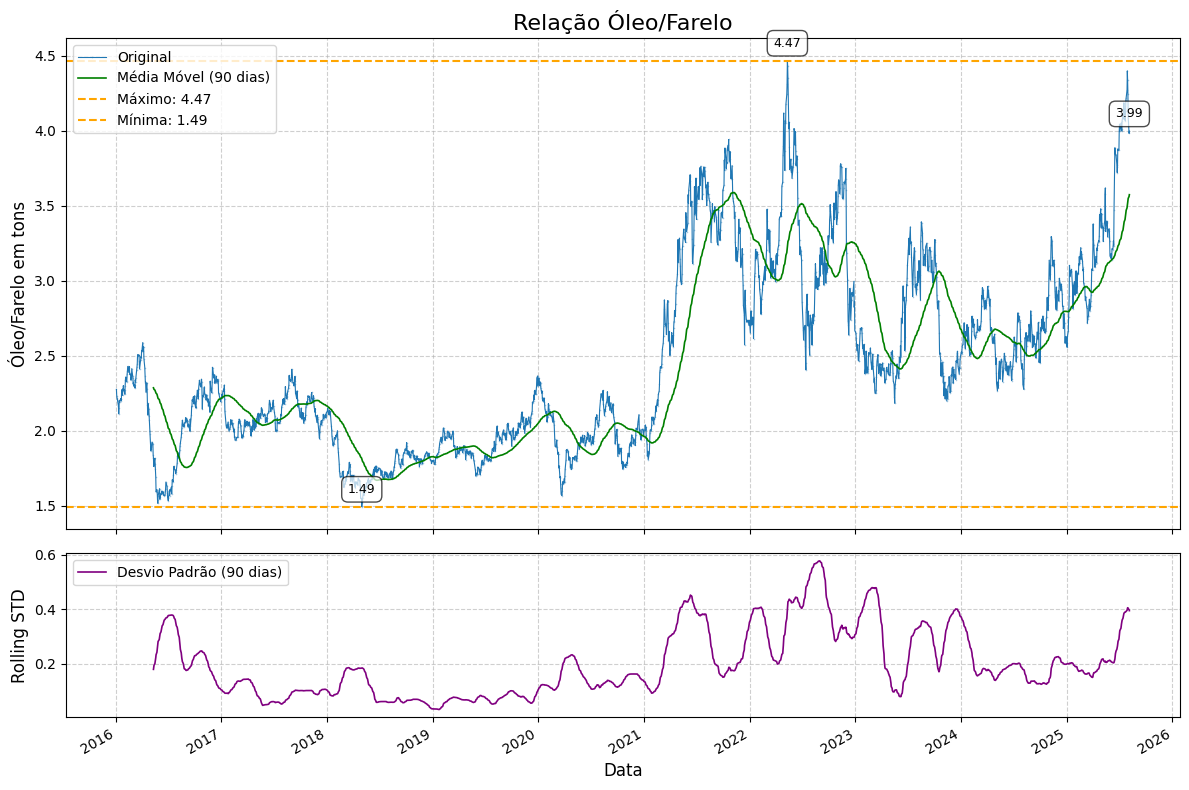

In [3]:

x = oleo_farelo['Date']
y = oleo_farelo['oleo/farelo']

# Estatísticas
y_max = y.max()
y_min = y.min()
rolling_window = 90
y_rolling_mean = y.rolling(window=rolling_window).mean()
y_rolling_std = y.rolling(window=rolling_window).std()

# Índices para máximo e mínimo
idx_max = y.idxmax()
idx_min = y.idxmin()

# Criar figura com 2 subplots (2 linhas, 1 coluna)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# --- Subplot 1: Série + Média Móvel ---
ax1.plot(x, y, marker='D', linewidth=0.8, markersize=0.1, label='Original')
ax1.plot(x, y_rolling_mean, color='green', linewidth=1.2, label=f'Média Móvel ({rolling_window} dias)')
ax1.axhline(y=y_max, color='orange', linestyle='--', linewidth=1.5, label=f'Máximo: {y_max:.2f}')
ax1.axhline(y=y_min, color='orange', linestyle='--', linewidth=1.5, label=f'Mínima: {y_min:.2f}')

# Rótulos do máximo e mínimo
ax1.annotate(f"{y_max:.2f}", (x[idx_max], y_max), xytext=(0, 10), textcoords="offset points",
             ha='center', fontsize=9, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))
ax1.annotate(f"{y_min:.2f}", (x[idx_min], y_min), xytext=(0, 10), textcoords="offset points",
             ha='center', fontsize=9, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))

# Rótulo do último valor
y_last, x_last = y.iloc[-1], x.iloc[-1]
ax1.annotate(f"{y_last:.2f}", (x_last, y_last), xytext=(0, 10), textcoords="offset points",
             ha='center', fontsize=9, bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.7))

ax1.set_title('Relação Óleo/Farelo', fontsize=16)
ax1.set_ylabel('Óleo/Farelo em tons', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='upper left')

# --- Subplot 2: Desvio Padrão Móvel ---
ax2.plot(x, y_rolling_std, color='purple', linewidth=1.2, label=f'Desvio Padrão ({rolling_window} dias)')
ax2.set_ylabel('Rolling STD', fontsize=12)
ax2.set_xlabel('Data', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(loc='upper left')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()
